# MINIST Dataset Notebook
## Informational Links about the MNIST dataset
**The gzip folders used for this MNIST dataset exercise can be found [here](http://yann.lecun.com/exdb/mnist/).**

### [Brief Explanation](https://corochann.com/mnist-dataset-introduction-1138.html)
#### The dataset consists of:
1. handwritten digit image:
    * grayscale image
    * 28x28 scale
2. label:
    * digit represented by the image
    * between 0-9

In [1]:
# Imports
import gzip
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Read the file content from the gzipped folders

In [2]:
# Source code adapted from:
# - https://stackoverflow.com/questions/48257255/how-to-import-pre-downloaded-mnist-dataset-from-a-specific-directory-or-folder
# - https://docs.python.org/3/library/gzip.html

In [3]:
# Read a gzip compressed file
# Handwritten image folder
with gzip.open('gzip_folders/t10k-images-idx3-ubyte.gz', 'rb') as t10k_img:
    image_t10k = t10k_img.read()

In [4]:
# Read a gzip compressed file
# Labels folder
with gzip.open('gzip_folders/t10k-labels-idx1-ubyte.gz', 'rb') as t10k_label:
    labels_t10k = t10k_label.read()

In [5]:
# Read a gzip compressed file
# Handwritten image folder
with gzip.open('gzip_folders/train-images-idx3-ubyte.gz', 'rb') as tr_img:
    image_tr = tr_img.read()

In [6]:
# Read a gzip compressed file
# Labels folder
with gzip.open('gzip_folders/train-labels-idx1-ubyte.gz', 'rb') as tr_label:
    labels_tr = tr_label.read()

# *Folders from t10k*

## Convert the content from bytes to integers
* Check the integer value of every 4 bytes from 0 to 16
* Go to [this website](http://yann.lecun.com/exdb/mnist/)
* Check the "TEST SET IMAGE FILE" heading with the file you are testing in the brackets
* If your output matches the number under the "[value]" column, then it is the correct output

**Note: The "??" output under "[value]" means the output is 0"**

## Handwritten Digit Image

In [7]:
# Obtain the file content type of the image_t10k folder
type(image_t10k)

bytes

In [8]:
# Get the first 4 bytes
image_t10k[0:4]

b'\x00\x00\x08\x03'

In [9]:
# Source code adapted from:
# - https://stackoverflow.com/questions/444591/convert-a-string-of-bytes-into-an-int-python
# - https://docs.python.org/3/library/stdtypes.html

In [10]:
# First 4 bytes
# You can use the output from the image_t10k[0:4]
int.from_bytes(b'\x00\x00\x08\x03', byteorder='big')

2051

### OR



In [11]:
# You can use image_t10k[0:4] instead of the 
# direct output since it's more efficient
int.from_bytes(image_t10k[0:4], byteorder='big')

2051

In [12]:
# Bytes 4 to 8
int.from_bytes(image_t10k[4:8], byteorder='big')

10000

In [13]:
# Bytes 8 to 12
int.from_bytes(image_t10k[8:12], byteorder='big')

28

In [14]:
# Bytes 12 to 16
int.from_bytes(image_t10k[12:16], byteorder='big')

28

In [15]:
# Bytes 16 to 17 - [value] being "??"
int.from_bytes(image_t10k[16:20], byteorder='big')

0

## Labels

In [16]:
# Obtain the file content type of the labels_t10k folder
type(labels_t10k)

bytes

In [17]:
# First 4 bytes
int.from_bytes(labels_t10k[0:4], byteorder='big')

2049

In [18]:
# Bytes 4 to 8
int.from_bytes(labels_t10k[4:8], byteorder='big')

10000

### Output 1

In [19]:
# Bytes 8 to 9
int.from_bytes(labels_t10k[8:9], byteorder='big')

7

### Output 2

In [20]:
# Bytes 9 to 10
int.from_bytes(labels_t10k[9:10], byteorder='big')

2

### Output 3

In [21]:
# Bytes 12 to 13
int.from_bytes(labels_t10k[12:13], byteorder='big')

4

### Output 4

In [22]:
# Bytes 15 to 16
int.from_bytes(labels_t10k[15:16], byteorder='big')

9

### Output 5

In [23]:
# Bytes 18 to 19
int.from_bytes(labels_t10k[18:19], byteorder='big')

0

## Convert bytes to integers
**Check if the numbers in the images match the number labels in each output**

In [24]:
# The reason why you know the image will show up between 16 and 800 is because:
# 1. When converting  handwritten images folder from bytes 16-17 to integer you get 0
# 2. Image scale is 28x28 which means 800 is the the no. where the number image ends
# 3. When converting labels_t10k folder from bytes 8-9 to integer you get 7

### Image 1 - Should match Output 1

In [25]:
# Obtain the image label from bytes 16 to 800 (28x28 - scale of the handwritten digit image)
image1 = np.array(list(image_t10k[16:800])).reshape(28,28).astype(np.uint8)

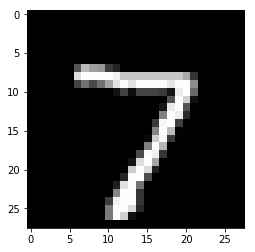

In [26]:
# According to the 
plt.imshow(image1, cmap='gray')

### Image 2 - Should match Output 2

In [27]:
# Obtain the image label from bytes 800 to 1584 (28x28 - scale of the handwritten digit image)
image2 = np.array(list(image_t10k[800:1584])).reshape(28,28).astype(np.uint8)

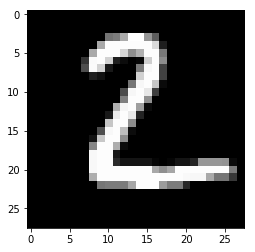

In [28]:
plt.imshow(image2, cmap='gray')

### Image 3 - Should match Output 3

In [29]:
# Obtain the image label from bytes 3152 to 3936 (28x28 - scale of the handwritten digit image)
image3 = np.array(list(image_t10k[3152:3936])).reshape(28,28).astype(np.uint8)

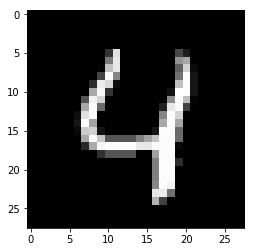

In [30]:
plt.imshow(image3, cmap='gray')

### Image 4 - Should match Output 4

In [31]:
# Obtain the image label from bytes 5504 to 6288 (28x28 - scale of the handwritten digit image)
image4 = np.array(list(image_t10k[5504:6288])).reshape(28,28).astype(np.uint8)

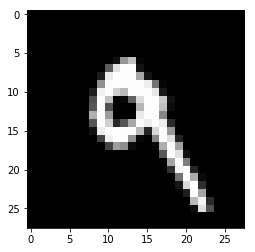

In [32]:
plt.imshow(image4, cmap='gray')

### Image 5 - Should match Output 5

In [33]:
# Obtain the image label from bytes 7856 to 8640 (28x28 - scale of the handwritten digit image)
image6 = np.array(list(image_t10k[7856:8640])).reshape(28,28).astype(np.uint8)

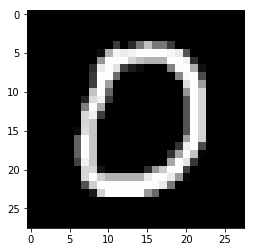

In [34]:
plt.imshow(image6, cmap='gray')

# *Folders from train*

In [35]:
# Obtain the file content type of the image_tr folder
type(image_tr)

bytes

In [36]:
# Get the first 4 bytes
image_tr[0:4]

b'\x00\x00\x08\x03'